In [1]:
from keras.datasets import mnist
# 학습용과 검증용 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터 전처리
X_train = X_train.reshape(60000, 784).astype('float32') /255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


[0.67, 0.66, 0.66, 0.67, 0.65, 0.67, 0.68, 0.67, 0.67, 0.66]
최적의 k: 7
최고 정확도: 0.68


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

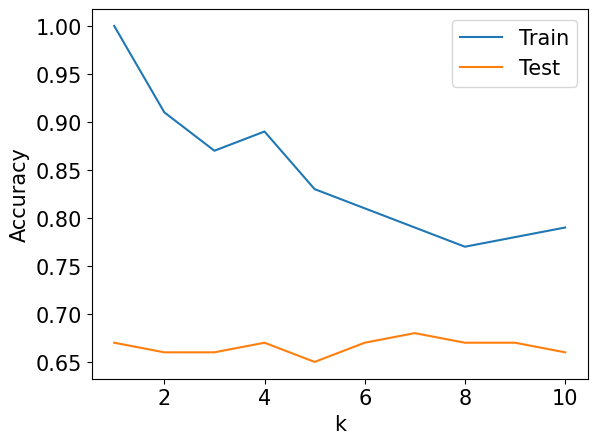

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train[:100], y_train[:100])
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train[:100], y_train[:100]))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test[:100], y_test[:100]))

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()

print(test_rate)
max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k:',idx+1)
print('최고 정확도:',max_rate)

In [3]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train[:100], y_train[:100])
print("학습용:",model.score(X_train[:100], y_train[:100]))
print("검증용:",model.score(X_test[:100], y_test[:100]))

학습용: 0.79
검증용: 0.68


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [4]:
#모형 저장
import pickle
pickle.dump(model, open('c:/data/mnist/mnist_knn.model','wb'))

In [5]:
# 모형 불러오기
model = pickle.load(open('c:/data/mnist/mnist_knn.model','rb'))
# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [7 6 1 0 4 1 9 4 1 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [6]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,0,1,2,3,4,5,6,7,8,9
0,866,11,2,11,8,10,54,15,1,2
1,0,1134,0,1,0,0,0,0,0,0
2,45,488,260,19,75,4,55,14,58,14
3,40,122,2,772,2,3,8,8,38,15
4,1,83,0,4,519,0,29,26,1,319
5,72,98,3,352,65,92,54,36,42,78
6,17,103,4,4,44,5,779,1,0,1
7,1,137,1,13,29,0,1,637,12,197
8,59,172,20,146,36,3,35,14,441,48
9,17,42,3,56,230,0,10,90,5,556


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.83       980
           1       0.47      1.00      0.64      1135
           2       0.88      0.25      0.39      1032
           3       0.56      0.76      0.65      1010
           4       0.51      0.53      0.52       982
           5       0.79      0.10      0.18       892
           6       0.76      0.81      0.79       958
           7       0.76      0.62      0.68      1028
           8       0.74      0.45      0.56       974
           9       0.45      0.55      0.50      1009

    accuracy                           0.61     10000
   macro avg       0.67      0.60      0.57     10000
weighted avg       0.67      0.61      0.58     10000

